In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('http://taanila.fi/mokki.xlsx')
df

,nro,ranta,pinta-ala,sähkö,hinta
0,1,30,50,0,95
1,2,35,42,0,95
2,3,40,25,1,80
3,4,50,30,1,100
4,5,55,45,0,135
5,6,60,24,1,100
6,7,60,60,1,210
7,8,70,34,1,160
8,9,80,32,0,150
9,10,85,28,0,150


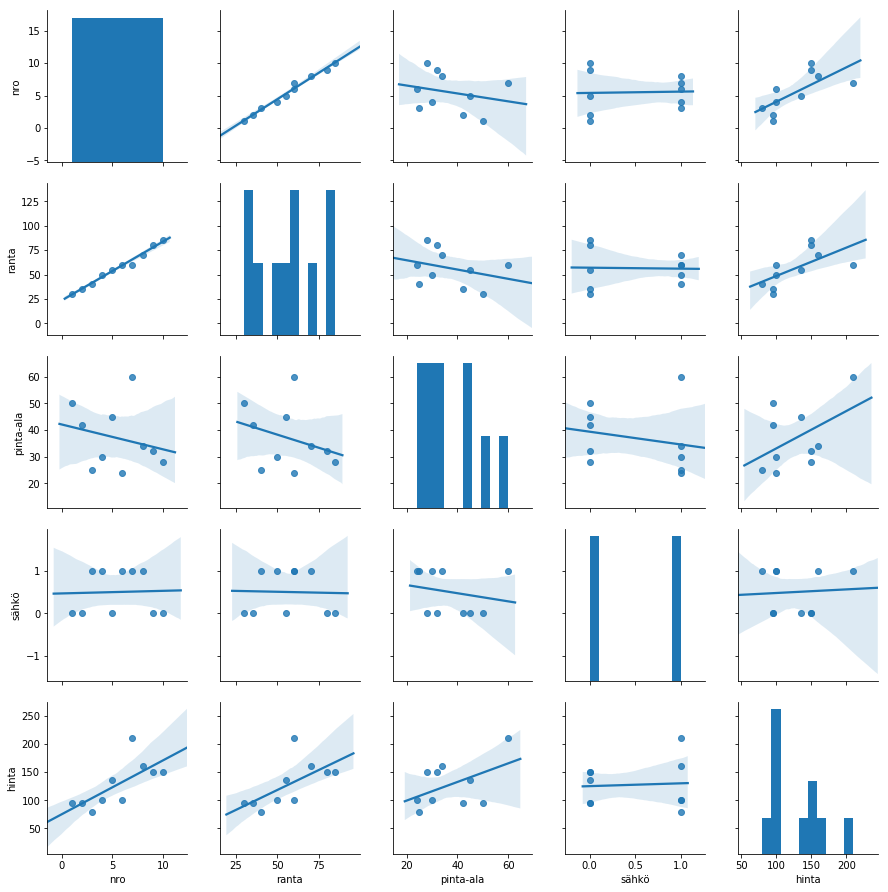

In [3]:
sns.pairplot(df, kind='reg')

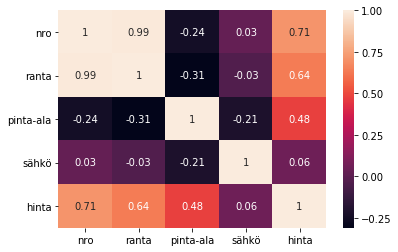

In [4]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
X = df[['ranta', 'pinta-ala', 'sähkö']]
y = df['hinta']

In [9]:
from sklearn.linear_model import LinearRegression
malli = LinearRegression().fit(X,y)
malli.coef_

array([ 1.9750098 ,  2.77578415, 20.29877373])

In [13]:
malli.intercept_

-96.94145434036429

In [14]:
malli.score(X,y)

0.9819136190845801

Text(0, 0.5, 'Poikkeama todellisesta')

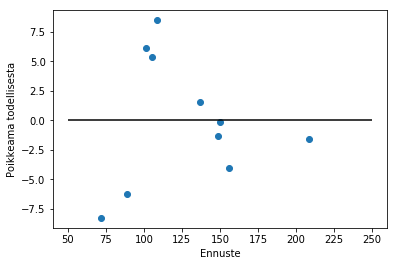

In [15]:
plt.scatter(malli.predict(X), malli.predict(X)-y)
plt.hlines(y=0, xmin=50, xmax=250)
plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')

Xuudet = pd.read_excel('http://taanila.fi/mokkinew.xlsx')
Xuudet['Hintaennuste']=malli.predict(Xuudet)
Xuudet

In [16]:
Xuudet = pd.read_excel('http://taanila.fi/mokkinew.xlsx')
Xuudet['Hintaennuste']=malli.predict(Xuudet)
Xuudet

,ranta,pinta-ala,sähkö,Hintaennuste
0,100,90,1,370.678873
1,60,56,1,197.301820
2,30,25,0,31.703444
3,50,30,0,85.082560
